In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

556


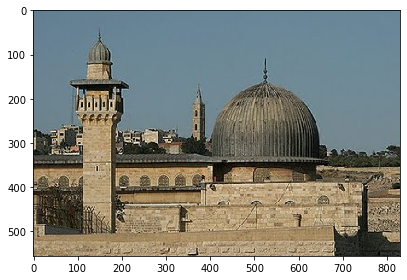

In [5]:
image1 = imread('aqsa.jpeg')
image1
imshow(image1)
print (len(image1))

[[0.47896196 0.47896196 0.47896196 ... 0.50641294 0.50641294 0.50641294]
 [0.47896196 0.47896196 0.47896196 ... 0.50641294 0.50641294 0.50641294]
 [0.47896196 0.47896196 0.47896196 ... 0.50641294 0.50641294 0.50641294]
 ...
 [0.5263451  0.53418824 0.54259686 ... 0.11513216 0.18572039 0.19356353]
 [0.53026667 0.5381098  0.54259686 ... 0.07983804 0.16611255 0.18179882]
 [0.5263451  0.52242353 0.52298902 ... 0.13866157 0.2092498  0.21709294]]


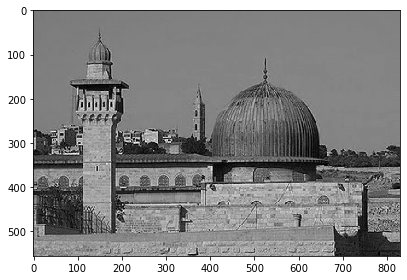

In [36]:
image2 = imread('aqsa.jpeg', as_gray=True)
imshow(image2);
print ((image2))

In [9]:
#Shape of images
print(image1.shape)
print(image2.shape)

(556, 830, 3)
(556, 830)


In [10]:
print(image1.size)
print(image2.size)

1384440
461480


**Feature extraction**

1. Pixel Features

In [16]:
pixel_feat = np.reshape(image2, (556 * 830))
pixel_feat

array([0.47896196, 0.47896196, 0.47896196, ..., 0.13866157, 0.2092498 ,
       0.21709294])

In [17]:
pixel_feat2 = np.reshape(image1, (556 * 830 * 3))
pixel_feat2

array([ 98, 127, 145, ...,  54,  56,  53], dtype=uint8)

2. Edge Features

### Previt kernel

* Prewitt Horizontal Kernel:

[ -1 -1 -1 ] <br>
[  0   0   0 ] <br>
[  1   1   1 ]

In [40]:
from skimage import filters
from skimage import feature
from skimage.filters import prewitt_h,prewitt_v
# prewitt kernel
pre_hor = prewitt_h(image2)


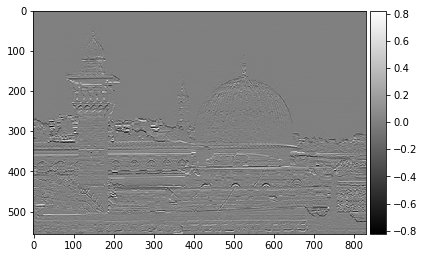

In [41]:
imshow(pre_hor, cmap='gray');

* Prewitt Vertical Kernel:

[ -1  0  1 ] <br>
[ -1  0  1 ] <br>
[ -1  0  1 ]

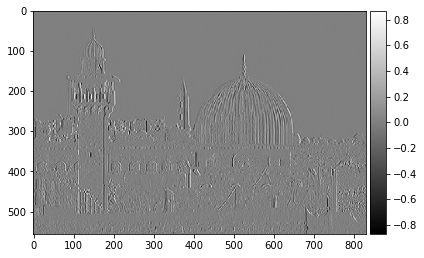

In [26]:
pre_ver = prewitt_v(image2)
imshow(pre_ver, cmap='gray')

* Sobel Operator Vertical

[ -1  0  1 ] <br>
[ -2  0  2 ] <br>
[ -1  0  1 ]

* Sobel Operator Horizontal

[ -1  -2  -1 ] <br>
[  0  0  0 ] <br>
[ 1  2  1 ]

In [33]:
# Sobel Kernel
ed_sobel = filters.sobel(image2)


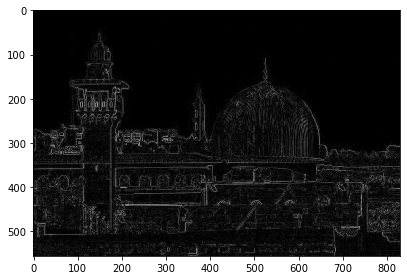

In [34]:
imshow(ed_sobel, cmap='gray');

In [35]:
#canny algorithm
can = feature.canny(image2)
can

array([[False, False, False, ..., False, False, False],
       [False,  True,  True, ...,  True,  True, False],
       [False,  True, False, ..., False,  True, False],
       ...,
       [False,  True, False, ...,  True, False, False],
       [False,  True,  True, ...,  True,  True, False],
       [False, False, False, ..., False, False, False]])

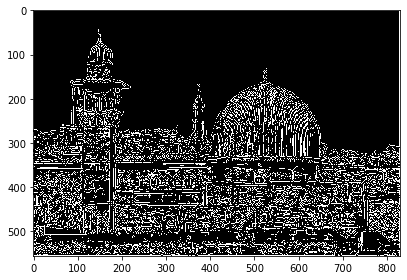

In [36]:
imshow(can, cmap='gray')

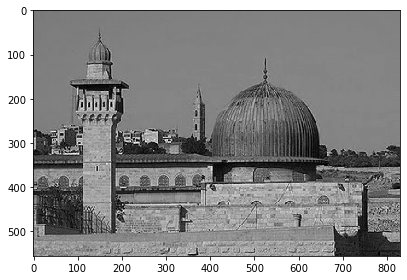

In [37]:
from skimage import color 
grayscale = color.rgb2gray(image1) 

imshow(grayscale)
plt.show()

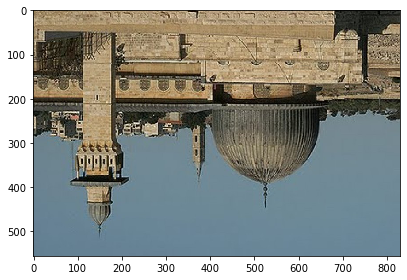

In [38]:
# Flip the image in up direction 
verticalflip = np.flipud(image1)

imshow(verticalflip)
plt.show()

(256, 128, 3)


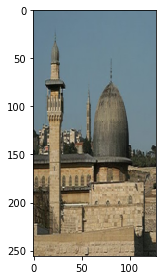

In [39]:
from skimage.transform import resize
resized_img = resize(image1, (256,128)) 
imshow(resized_img) 
print(resized_img.shape)

In [ ]:
# resized_img=image1

In [40]:
from skimage.feature import hog
from skimage import exposure
#creating hog features 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

C:\Users\Muhammad_Sohail\AppData\Local\Temp\ipykernel_10780\4153077231.py:4: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


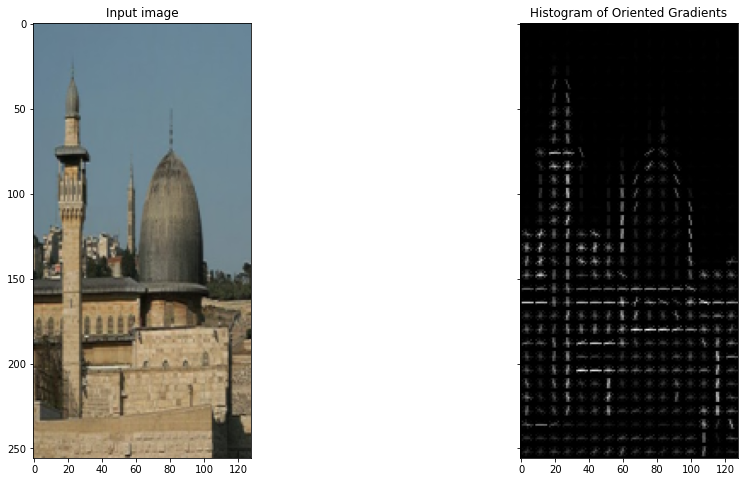

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [42]:
#feature vector
fd

array([0.27109908, 0.11991819, 0.02497091, ..., 0.07400005, 0.10588588,
       0.06115505])

In [1]:
!pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2

In [2]:

image = cv2.imread('aqsa.jpeg')

cv2.imshow('Image', image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
# Display the grayscale image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow('Grayscale Image', gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
new_width = 500
new_height = 600

resized_image = cv2.resize(image, (new_width, new_height))

cv2.imshow('Resized Image', resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
cv2.imwrite('new_image.jpg', resized_image)

True

### Gausian Kernel

[1 2 1]<br>
[2 4 2]<br>
[1 2 1]

In [45]:
blurred_image = cv2.GaussianBlur(resized_image, (35,35), 0)

# Display the blurred image
cv2.imshow('Blurred Image', blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [8]:
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray_image, 100, 200)
cv2.imshow('Edges', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [46]:
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding (adjust the threshold value as needed)
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

cv2.imshow('Binary Thresholded Image', binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Detect faces

In [48]:
import cv2

image = cv2.imread('kid.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=1, minSize=(300, 300))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('Image with Faces Detected', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
import cv2

bg_subtractor = cv2.createBackgroundSubtractorMOG2()

cap = cv2.VideoCapture('video.mp4')

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    fg_mask = bg_subtractor.apply(frame)
    

    cv2.imshow('Foreground Mask', fg_mask)
    
    if cv2.waitKey(30) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

# Lab Tasks

1. Read an image and convert it to grey scale. Apply sobel kernel using opencv and from scratch (vertical).
3. Apply gausian filter kernal to blur an image from scratch and opencv (Use RGB image and 3x3 gausian kernel).
4. Upload a group image and all detect faces in it (5 people at least).
5. Upload a video of people preferably walking of people count how many occurances of people are in it (if the person's face is appearing at +20 or -20 pixels from center in consective frames then assume it as same person).
6. Upload a video and apply gausian kernal on it in frames where a face is appeared.
7. Upload a video and apply canny edge detector on it in frames where there is no frame.

In [ ]:
from google.colab.patches import cv2_imshow